# <font style = 'color:blue'> # HDB Resale Price Prediction 
**Objective:** To develop a predictive model that identifies the key drivers of HDB resale prices, enabling Real Estate agents to provide more accurate and data-driven pricing advice.



## Import Set-Up

In [1]:
# STEP 1: Setup & Load Data

# Libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# ML tools
from pathlib import Path

# Set display options for better readability
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import xgboost as xgb

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Define Paths
DATA_DIR = Path("/Users/debbiego/Desktop/Myfolder/Data_Sprint/data")
TRAIN_FILE = DATA_DIR / "final_hdb_cleaned_train.csv"
TEST_FILE  = DATA_DIR / "final_hdb_cleaned_test.csv"

# ------------------------------
# Load datasets
# ------------------------------
hdb  = pd.read_csv(TRAIN_FILE)
test = pd.read_csv(TEST_FILE)

# Quick check
print("Train shape:", hdb.shape)
print("Test shape :", test.shape)

display(hdb.head(5))


Train shape: (150634, 14)
Test shape : (16737, 13)


,floor_area_sqft,max_floor_lvl,5room_sold,year_completed,upper,mid_storey,mid,lower,mrt_nearest_distance,Hawker_Nearest_Distance,flat_type,town,remaining_lease,resale_price
0,968.760,25,46,2005,12,11,11,10,330.083069,154.753357,4 ROOM,KALLANG/WHAMPOA,89,680000.0
1,1399.320,9,56,1987,9,8,8,7,903.659703,640.151925,5 ROOM,BISHAN,74,665000.0
2,1550.016,16,30,1996,15,14,14,13,1334.251197,1762.082341,EXECUTIVE,BUKIT BATOK,83,838000.0
3,1108.692,11,7,1990,5,3,3,1,907.453484,726.215262,4 ROOM,BISHAN,79,550000.0
4,893.412,4,18,1987,3,2,2,1,412.343032,1540.151439,4 ROOM,YISHUN,69,298000.0



# EDA

**Steps Taken:** 

1. Read the HDB data into a pandas DataFrame
2. Gather some basic information about the data.
3. Data Cleaning and Feature Engineering (added new feature 'Remaining lease")
4. Data Visualization 


 Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   floor_area_sqft          150634 non-null  float64
 1   max_floor_lvl            150634 non-null  int64  
 2   5room_sold               150634 non-null  int64  
 3   year_completed           150634 non-null  int64  
 4   upper                    150634 non-null  int64  
 5   mid_storey               150634 non-null  int64  
 6   mid                      150634 non-null  int64  
 7   lower                    150634 non-null  int64  
 8   mrt_nearest_distance     150634 non-null  float64
 9   Hawker_Nearest_Distance  150634 non-null  float64
 10  flat_type                150634 non-null  object 
 11  town                     150634 non-null  object 
 12  remaining_lease          150634 non-null  int64  
 13  resale_price             150634 non-null  flo

,count,mean,std,min,25%,50%,75%,max
floor_area_sqft,150634.0,1046.235290,262.674321,333.684000,807.300000,1022.580000,1205.568000,3.013920e+03
max_floor_lvl,150634.0,15.139816,6.232492,2.000000,12.000000,13.000000,16.000000,5.000000e+01
5room_sold,150634.0,26.299853,33.456575,0.000000,0.000000,3.000000,50.000000,1.640000e+02
year_completed,150634.0,1990.922906,12.202185,1949.000000,1983.000000,1989.000000,1999.000000,2.018000e+03
upper,150634.0,9.321275,5.507364,3.000000,6.000000,9.000000,12.000000,5.100000e+01
mid_storey,150634.0,8.284823,5.508074,2.000000,5.000000,8.000000,11.000000,5.000000e+01
mid,150634.0,8.284823,5.508074,2.000000,5.000000,8.000000,11.000000,5.000000e+01
lower,150634.0,7.248370,5.515155,1.000000,4.000000,7.000000,10.000000,4.900000e+01
mrt_nearest_distance,150634.0,765.007872,429.366039,21.971410,458.266301,682.621343,975.734180,3.544504e+03
Hawker_Nearest_Distance,150634.0,1173.700148,1076.701337,1.873295,372.132398,778.966980,1678.949229,4.907036e+03



 Target Variable Distribution
Mean   : 449161.50121307274
Median : 420000.0
Std    : 143307.57314317566
Skew   : 1.083758550913144

Percentiles:
0.01    228000.0
0.05    268000.0
0.25    347000.0
0.50    420000.0
0.75    520000.0
0.95    735000.0
0.99    888000.0
Name: resale_price, dtype: float64


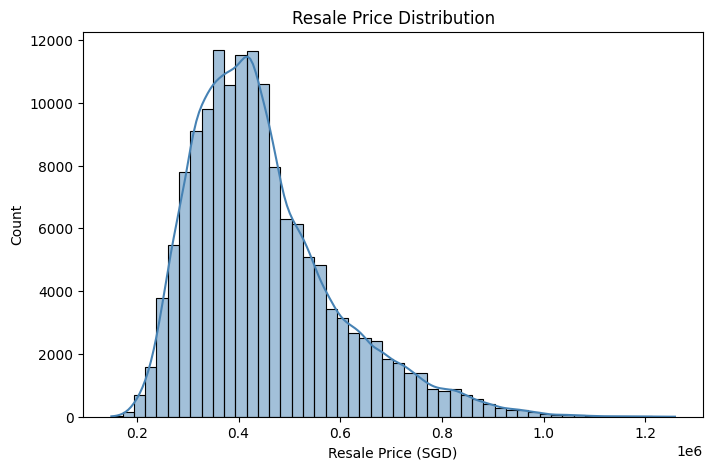


🔎 Unique values in flat_type: 7
flat_type
4 ROOM              61136
3 ROOM              39060
5 ROOM              36415
EXECUTIVE           11989
2 ROOM               1896
1 ROOM                 82
MULTI-GENERATION       56
Name: count, dtype: int64

🔎 Unique values in town: 26
town
JURONG WEST      11451
WOODLANDS        11334
SENGKANG         11069
TAMPINES         10506
YISHUN           10042
BEDOK             9046
PUNGGOL           7793
HOUGANG           7555
ANG MO KIO        6908
CHOA CHU KANG     6343
Name: count, dtype: int64


In [3]:
# STEP 2: Exploratory Data Analysis (EDA)

# ------------------------------
# Basic info
# ------------------------------
print(" Dataset Info")
print("=" * 40)
hdb.info()

print("\n Missing Values")
print("=" * 40)
print(hdb.isna().sum())

# ------------------------------
# Summary statistics
# ------------------------------
print("\n Summary Statistics (Numeric)")
print("=" * 40)
display(hdb.describe().T)

# ------------------------------
# Target variable (resale_price)
# ------------------------------
target = "resale_price"

print("\n Target Variable Distribution")
print("=" * 40)
print("Mean   :", hdb[target].mean())
print("Median :", hdb[target].median())
print("Std    :", hdb[target].std())
print("Skew   :", hdb[target].skew())

# Percentiles
print("\nPercentiles:")
print(hdb[target].quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]))

# Plot distribution
plt.figure(figsize=(8,5))
sns.histplot(hdb[target], bins=50, kde=True, color="steelblue")
plt.title("Resale Price Distribution")
plt.xlabel("Resale Price (SGD)")
plt.ylabel("Count")
plt.show()

# ------------------------------
# Categorical features quick check
# ------------------------------
categorical_features = ["flat_type", "town"]  # update if more exist
for col in categorical_features:
    if col in hdb.columns:
        print(f"\n🔎 Unique values in {col}: {hdb[col].nunique()}")
        print(hdb[col].value_counts().head(10))


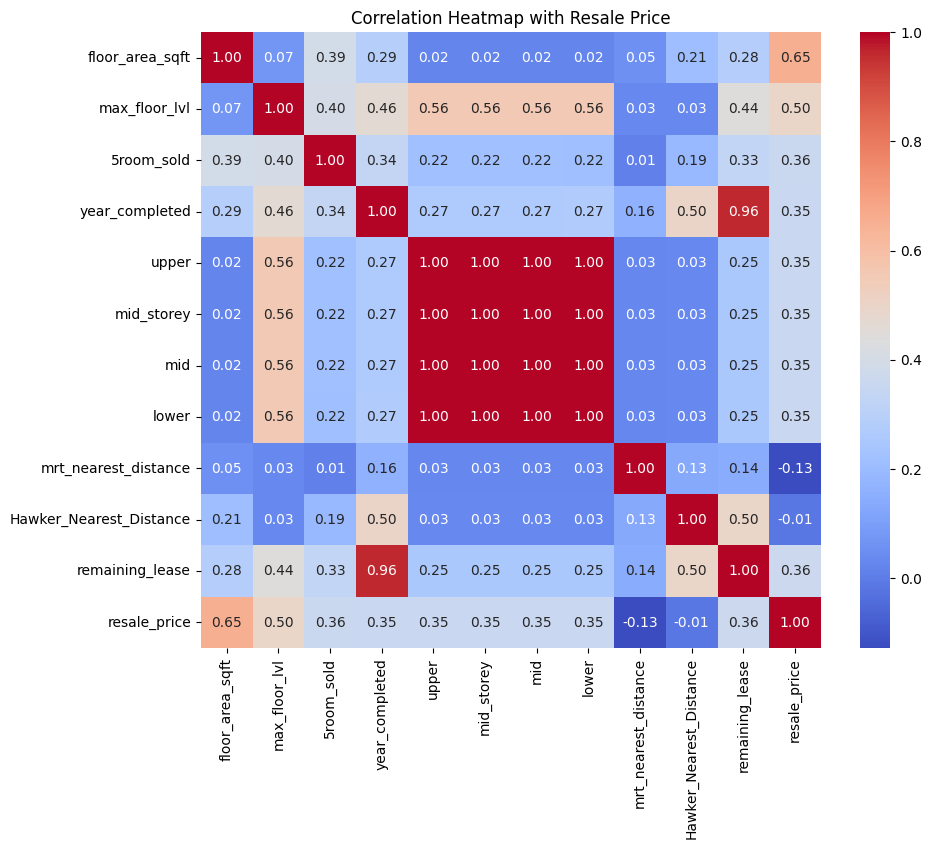

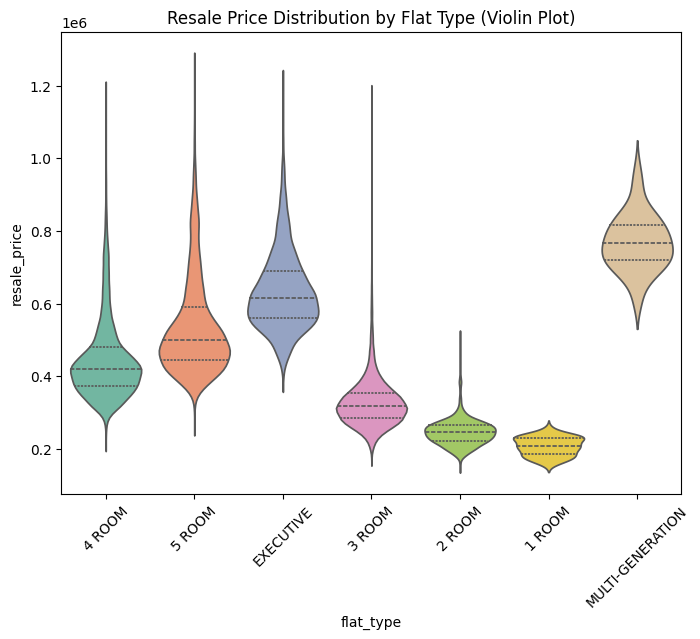

In [4]:
# Correlation among Numeric Features
numeric_features = [
    "floor_area_sqft", "max_floor_lvl", "5room_sold", "year_completed",
    "upper", "mid_storey", "mid", "lower",
    "mrt_nearest_distance", "Hawker_Nearest_Distance", "remaining_lease"
]

# ------------------------------
# Correlation heatmap (numeric features)
# ------------------------------
plt.figure(figsize=(10,8))
corr = hdb[numeric_features + ["resale_price"]].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap with Resale Price")
plt.show()

# ------------------------------
# Price Distribution by Flat Type (Violin plot)
# ------------------------------
plt.figure(figsize=(8,6))
sns.violinplot(x="flat_type", y="resale_price", data=hdb, inner="quartile", palette="Set2")
plt.title("Resale Price Distribution by Flat Type (Violin Plot)")
plt.xticks(rotation=45)
plt.show()



--- Correlation of Key Features with Resale Price ---
resale_price       1.000000
floor_area_sqft    0.654120
remaining_lease    0.362285
year_completed     0.353698
Name: resale_price, dtype: float64
-------------------------------------------------------


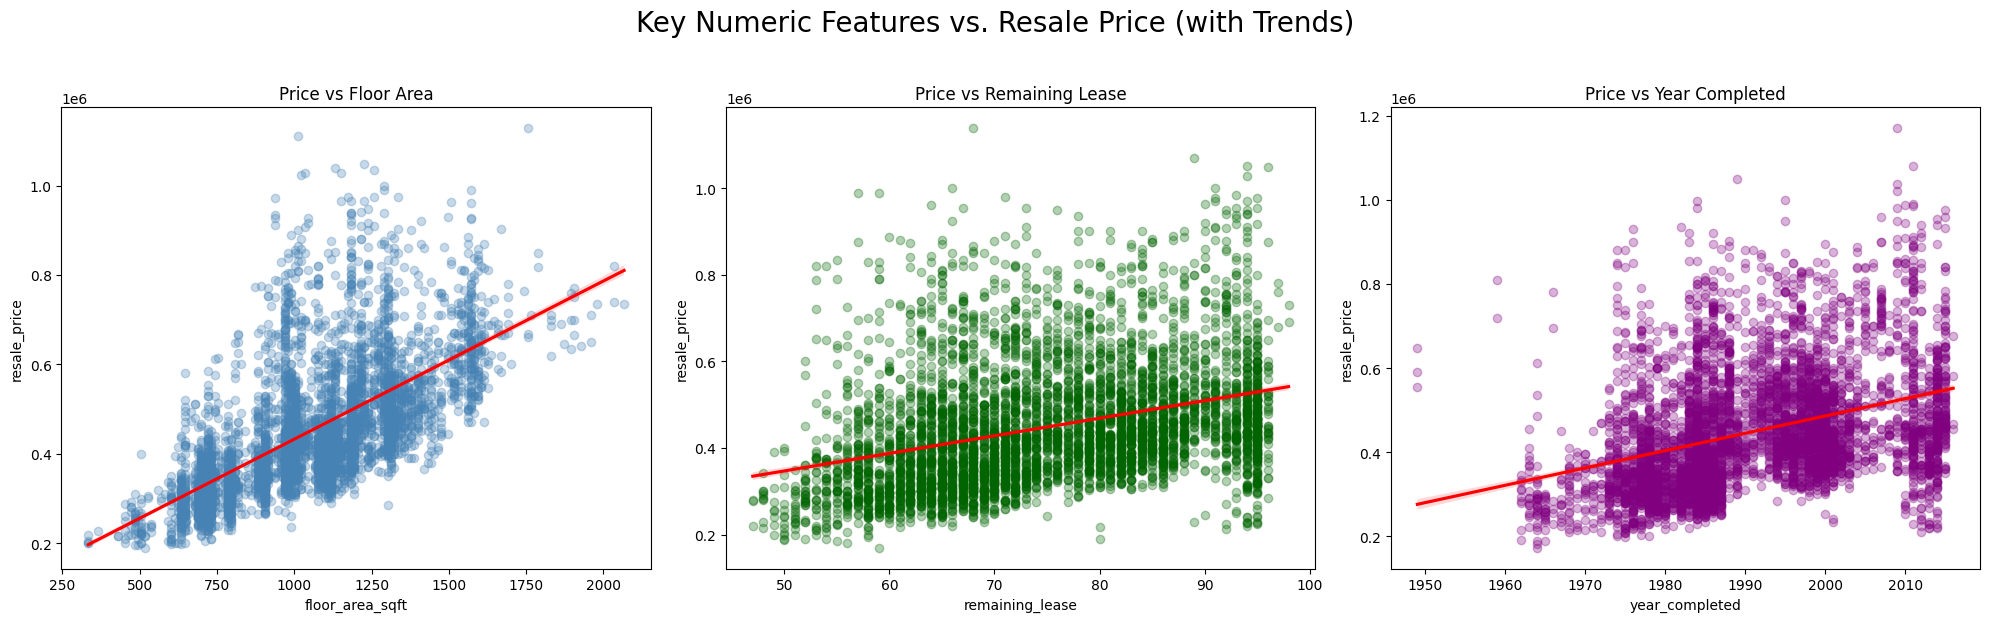

In [5]:
# ---------------------------
# Key Feature Relationships 
# ---------------------------
# Define the key numeric features
numeric_features = ["floor_area_sqft", "remaining_lease", "year_completed"]

# --- 1. Calculate and Print Correlation ---
# This gives a precise statistical measure of the linear relationship
print("--- Correlation of Key Features with Resale Price ---")
correlation = hdb[numeric_features + ["resale_price"]].corr()["resale_price"].sort_values(ascending=False)
print(correlation)
print("-" * 55)


# --- 2. Create Scatterplots with Regression Lines ---
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Key Numeric Features vs. Resale Price (with Trends)', fontsize=20, y=1.03)

# Plot 1: Price vs Floor Area
sns.regplot(
    ax=axes[0], x="floor_area_sqft", y="resale_price",
    data=hdb.sample(5000),
    scatter_kws={'alpha': 0.3, 'color': 'steelblue'},
    line_kws={'color': 'red'}
)
axes[0].set_title("Price vs Floor Area")

# Plot 2: Price vs Remaining Lease
sns.regplot(
    ax=axes[1], x="remaining_lease", y="resale_price",
    data=hdb.sample(5000),
    scatter_kws={'alpha': 0.3, 'color': 'darkgreen'},
    line_kws={'color': 'red'}
)
axes[1].set_title("Price vs Remaining Lease")

# Plot 3: Price vs Year Completed
sns.regplot(
    ax=axes[2], x="year_completed", y="resale_price",
    data=hdb.sample(5000),
    scatter_kws={'alpha': 0.3, 'color': 'purple'},
    line_kws={'color': 'red'}
)
axes[2].set_title("Price vs Year Completed")

plt.tight_layout()
plt.show()

🔎 Correlation with resale_price
resale_price               1.000000
Hawker_Nearest_Distance   -0.014537
mrt_nearest_distance      -0.128222
Name: resale_price, dtype: float64


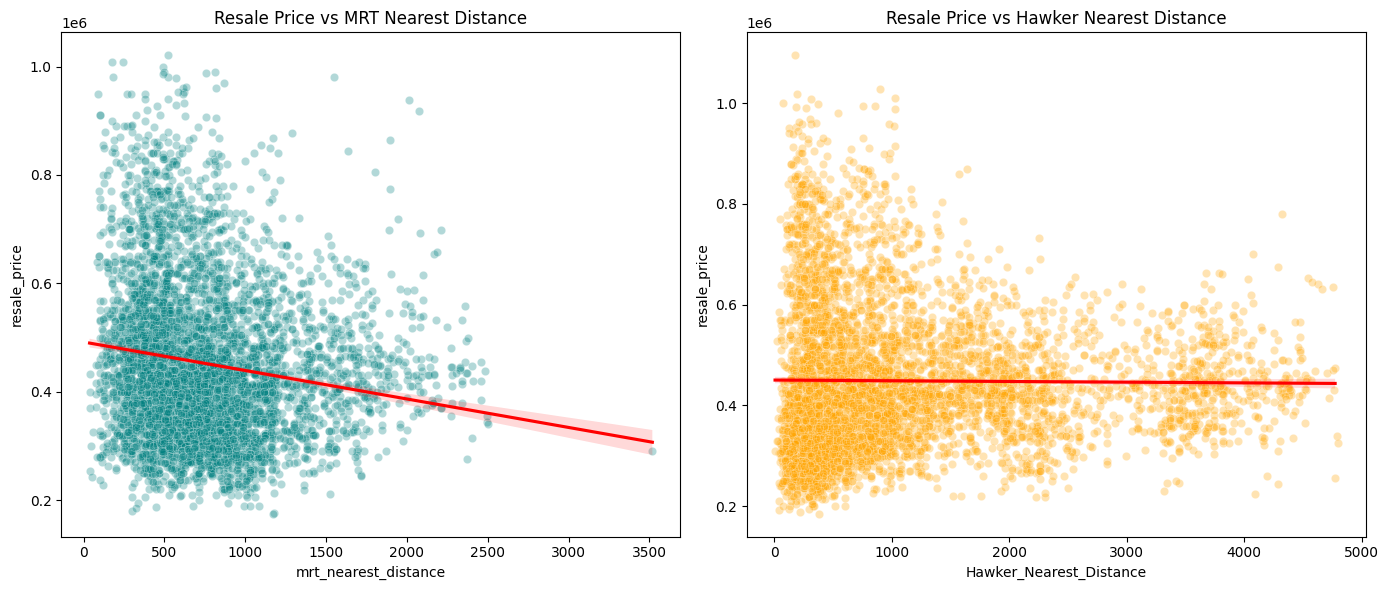

In [6]:
#  Location Features vs Resale Price

location_features = ["mrt_nearest_distance", "Hawker_Nearest_Distance"]

# ------------------------------
# Correlation values
# ------------------------------
print("🔎 Correlation with resale_price")
print(hdb[location_features + ["resale_price"]].corr()["resale_price"].sort_values(ascending=False))

# ------------------------------
# Scatterplots with regression lines
# ------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# MRT distance
sns.scatterplot(ax=axes[0], x="mrt_nearest_distance", y="resale_price", 
                data=hdb.sample(5000), alpha=0.3, color="teal")
sns.regplot(ax=axes[0], x="mrt_nearest_distance", y="resale_price", 
            data=hdb.sample(5000), scatter=False, color="red")
axes[0].set_title("Resale Price vs MRT Nearest Distance")

# Hawker distance
sns.scatterplot(ax=axes[1], x="Hawker_Nearest_Distance", y="resale_price", 
                data=hdb.sample(5000), alpha=0.3, color="orange")
sns.regplot(ax=axes[1], x="Hawker_Nearest_Distance", y="resale_price", 
            data=hdb.sample(5000), scatter=False, color="red")
axes[1].set_title("Resale Price vs Hawker Nearest Distance")

plt.tight_layout()
plt.show()


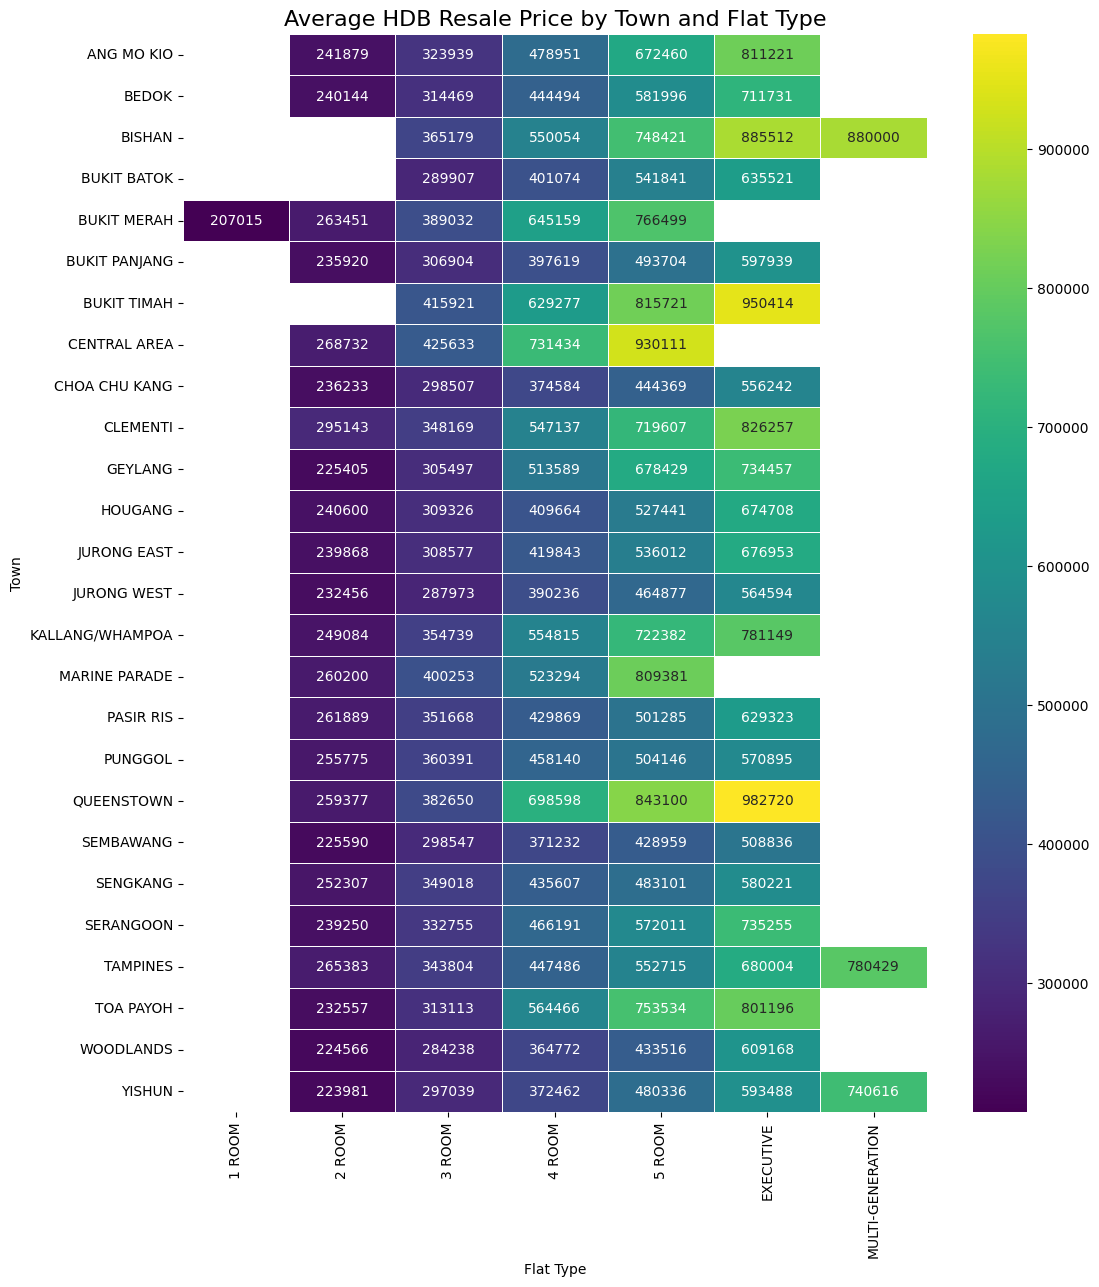

In [7]:
# ------------------------------
# Price by Town and Flat Type Heatmap
# ------------------------------
# Create a pivot table to calculate the average resale price
# with 'town' as the rows and 'flat_type' as the columns.
price_heatmap_data = hdb.pivot_table(
    values='resale_price',
    index='town',
    columns='flat_type',
    aggfunc='mean'
)

# Create the heatmap figure
plt.figure(figsize=(12, 14))
sns.heatmap(
    price_heatmap_data,
    annot=True,          # Show the actual average prices on the map
    fmt=".0f",           # Format numbers as whole numbers (e.g., 450000)
    cmap='viridis',      # Use a color scheme that's easy to read
    linewidths=.5
)

# Add titles for clarity
plt.title('Average HDB Resale Price by Town and Flat Type', fontsize=16)
plt.xlabel('Flat Type')
plt.ylabel('Town')
plt.show()

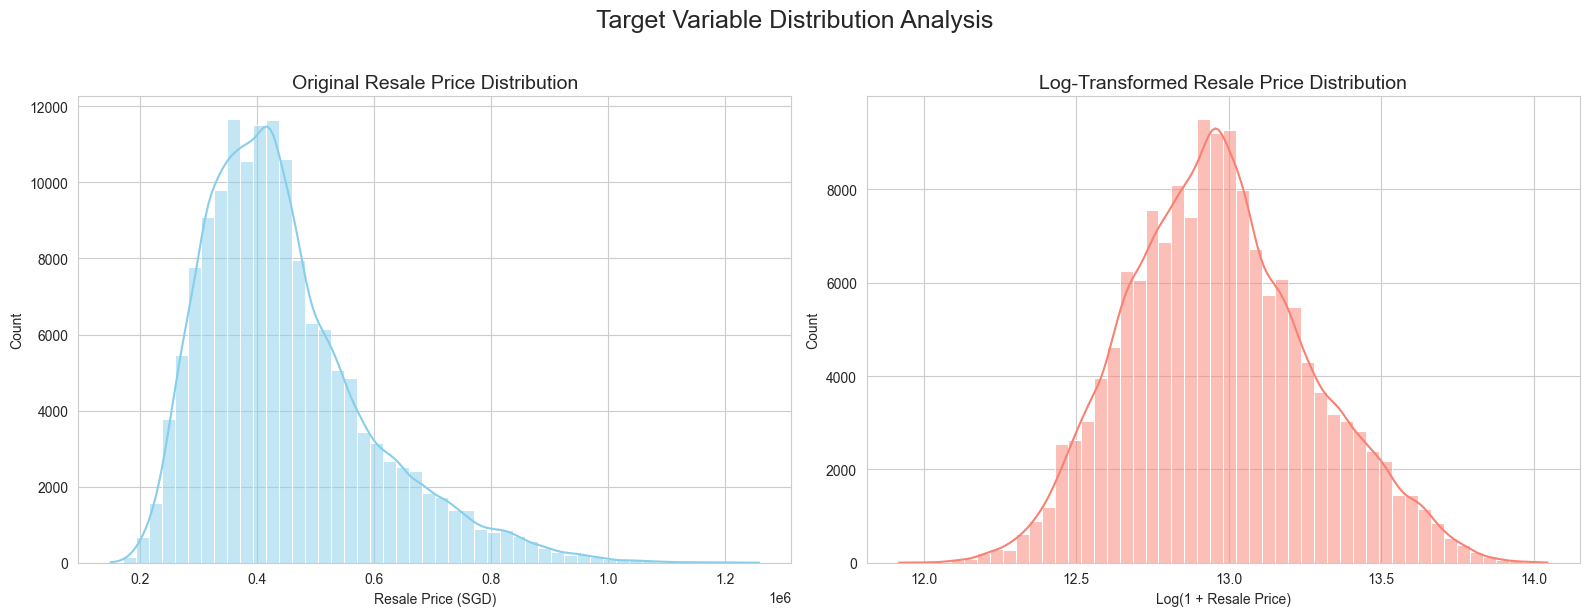

In [8]:
# ------------------------------
# Apply a logarithm to target variable (resale price) to improve model stability & performance
# ------------------------------
# Set plot style
sns.set_style("whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the original distribution
sns.histplot(hdb['resale_price'], kde=True, ax=axes[0], bins=50, color='skyblue')
axes[0].set_title('Original Resale Price Distribution', fontsize=14)
axes[0].set_xlabel('Resale Price (SGD)')

# Plot the log-transformed distribution
sns.histplot(np.log1p(hdb['resale_price']), kde=True, ax=axes[1], bins=50, color='salmon')
axes[1].set_title('Log-Transformed Resale Price Distribution', fontsize=14)
axes[1].set_xlabel('Log(1 + Resale Price)')

plt.suptitle('Target Variable Distribution Analysis', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

## Feature Engineering & Preprocessing

In [9]:
# STEP 3: Feature Engineering & Preprocessing

# 3.1 Apply log transformation to the target variable in the training data
hdb['resale_price_log'] = np.log1p(hdb['resale_price'])

# 3.2 Define features (X) and target (y)
features = [col for col in test.columns] # Use columns from test set to define features
X = hdb[features]
y = hdb['resale_price_log']
X_test = test[features]

# 3.3 Identify categorical features for encoding
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# 3.4 One-Hot Encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]), index=X.index)
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]), index=X_test.index)
X_test_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# 3.5 Combine with numerical features to create the final datasets
X_numerical = X.select_dtypes(include=np.number)
X_test_numerical = X_test.select_dtypes(include=np.number)

X_final = pd.concat([X_numerical, X_encoded], axis=1)
X_test_final = pd.concat([X_test_numerical, X_test_encoded], axis=1)

print(f"\nFinal training data shape: {X_final.shape}")
print(f"Final test data shape: {X_test_final.shape}")


Final training data shape: (150634, 44)
Final test data shape: (16737, 44)


## Predictive Modeling: Finding the Best Approach

In [10]:
# STEP 4: Predictive Modeling

# ------------------------------------
# 4.1 Advanced Model: XGBoost Regressor
# ------------------------------------

# Split the data for validation
X_train, X_val, y_train, y_val = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor model
xgb_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1500,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,  # Use all available CPU cores
    early_stopping_rounds=50 # This enables early stopping
)

# Train the model
xgb_reg.fit(X_train, y_train,
            eval_set=[(X_val, y_val)],
            verbose=False)


# Make predictions on the validation set
y_pred_log = xgb_reg.predict(X_val)

# Convert predictions and actual values back from log scale to the original price scale
y_pred_orig = np.expm1(y_pred_log)
y_val_orig = np.expm1(y_val)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_val_orig, y_pred_orig))
r2 = r2_score(y_val_orig, y_pred_orig)

print("\n--- XGBoost model results ---")
print(f"Validation Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"Validation R-squared (R²): {r2:.4f}")




--- XGBoost model results ---
Validation Root Mean Squared Error (RMSE): $25,058.92
Validation R-squared (R²): 0.9692


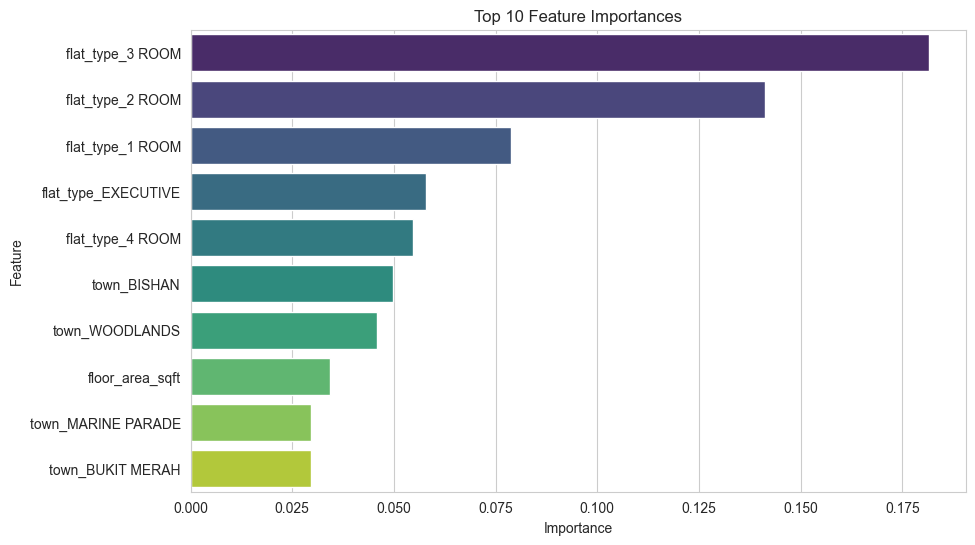

,Feature,Importance
13,flat_type_3 ROOM,0.181455
12,flat_type_2 ROOM,0.141227
11,flat_type_1 ROOM,0.078847
16,flat_type_EXECUTIVE,0.057785
14,flat_type_4 ROOM,0.054637
20,town_BISHAN,0.049735
42,town_WOODLANDS,0.045821
0,floor_area_sqft,0.034216
33,town_MARINE PARADE,0.029532
22,town_BUKIT MERAH,0.029505


In [11]:
# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_final.columns,
    'Importance': xgb_reg.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances')
plt.show()

display(feature_importance_df.head(10))

In [12]:
# ------------------------------------
# 4.2 Baseline Model: Linear Regression
# ------------------------------------

# ------------------------------
# Train the Linear Regression model
# ------------------------------
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# ------------------------------
# Evaluate the Baseline Model
# ------------------------------
# Make predictions on the validation set
y_pred_lr_log = lr_model.predict(X_val)

# Convert predictions back to the original price scale
y_pred_lr_orig = np.expm1(y_pred_lr_log)

# Calculate metrics for the baseline model
rmse_lr = np.sqrt(mean_squared_error(y_val_orig, y_pred_lr_orig))
r2_lr = r2_score(y_val_orig, y_pred_lr_orig)


# ------------------------------
# Compare Model Performances
# ------------------------------
print("\n--- Model Performance Comparison ---")
print(f"Linear Regression RMSE: ${rmse_lr:,.2f} (Baseline Model)")
print(f"XGBoost Regressor RMSE: ${rmse:,.2f}")
print("-" * 40)
print(f"Linear Regression R²: {r2_lr:.4f} (Baseline model)")
print(f"XGBoost Regressor R²: {r2:.4f}")
print("-" * 40)


--- Model Performance Comparison ---
Linear Regression RMSE: $49,161.75 (Baseline Model)
XGBoost Regressor RMSE: $25,058.92
----------------------------------------
Linear Regression R²: 0.8815 (Baseline model)
XGBoost Regressor R²: 0.9692
----------------------------------------


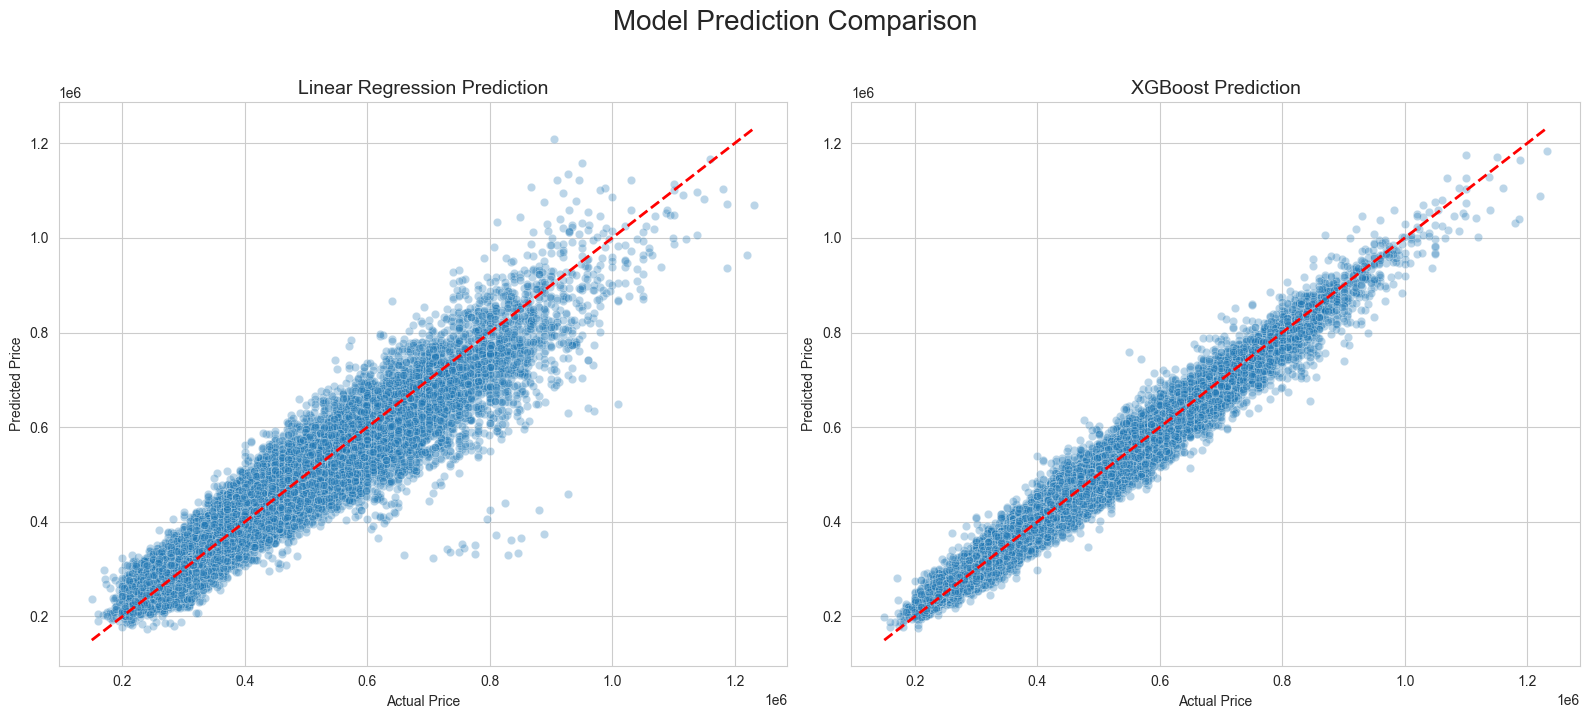


--- Model Performance Summary ---


Metric,Linear Regression,XGBoost,+/- % Improvement
R-squared (R²),0.8815,0.9692,+9.95%
RMSE,"$49,161.75","$25,058.92",-49.03%


In [15]:
# ------------------------------------
# 4.3 Model Performance Visualization
# ------------------------------------

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Model Prediction Comparison', fontsize=20, y=1.02)

# Plot for Linear Regression (Baseline)
sns.scatterplot(ax=axes[0], x=y_val_orig, y=y_pred_lr_orig, alpha=0.3)
axes[0].plot([y_val_orig.min(), y_val_orig.max()], [y_val_orig.min(), y_val_orig.max()], '--', color='red', lw=2)
axes[0].set_title('Linear Regression Prediction', fontsize=14)
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')

# Plot for XGBoost Regressor
sns.scatterplot(ax=axes[1], x=y_val_orig, y=y_pred_orig, alpha=0.3)
axes[1].plot([y_val_orig.min(), y_val_orig.max()], [y_val_orig.min(), y_val_orig.max()], '--', color='red', lw=2)
axes[1].set_title('XGBoost Prediction', fontsize=14)
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Predicted Price')

plt.tight_layout()
plt.show()

# --- 2. Metrics Table with Improvement Column  ---

# Calculate percentage improvement
r2_improvement = ((r2 - r2_lr) / r2_lr) * 100
rmse_improvement = ((rmse - rmse_lr) / rmse_lr) * 100

# Create a new DataFrame with pre-formatted strings for display
summary_data = {
    'Metric': ['R-squared (R²)', 'RMSE'],
    'Linear Regression': [f"{r2_lr:.4f}", f"${rmse_lr:,.2f}"],
    'XGBoost': [f"{r2:.4f}", f"${rmse:,.2f}"],
    '+/- % Improvement': [f"{r2_improvement:+.2f}%", f"{rmse_improvement:+.2f}%"]
}
results_df = pd.DataFrame(summary_data)


print("\n--- Model Performance Summary ---")
display(results_df.style.hide(axis="index"))

## Model Performance Insights:

1. **Accuracy**- The **XGBoost model provides a far more precise pricing tool for agents and clients**. Its average prediction error **(RMSE) is $25,058, which is a 49% reduction compared to the baseline Linear Regression model's error of $49,161**. This dramatic increase in accuracy leads to more reliable and trustworthy price estimates.

2. **Explanatory Power** - The superior performance of XGBoost, which **explains 97% of price variations versus the baseline's 88%**, proves that the HDB resale market is complex and non-linear. This justifies the strategic decision to use an advanced model. XGBoost can capture the nuanced interactions that a simple model misses—such as how the value of additional floor space changes depending on the desirability of the town—leading to a more intelligent and context-aware pricing tool

## Recommendation for Real Estate Agents:

1. Focus on the Core Factors: The model confirms that the **most critical factors are flat type, floor area, and town**. Agents should prioritize these when advising clients. The flat type sets the baseline price, the town determines the premium, and the exact floor area fine-tunes the value.

2. **Location Premium is Real**: The model consistently identifies towns like Bishan, Bukit Merah, and Marine Parade as top factors driving higher valuations. This premium is strongly linked to their established amenities and excellent connectivity. Our analysis validates this, showing that access to public transport is highly valued, with flats closer to an MRT station consistently commanding higher prices—a key advantage embedded within these mature estates.

3.  **Lease Decay Matters**: remaining_lease is a consistently important feature. Agents should educate clients that the **value of a flat is directly tied to its remaining lease**, and this will become an increasingly important factor for older flats.

## Model Application: Interactive Price Predictor

In [16]:
## Step 5: Model Application: Interactive Price Predictor

# --- 5.1 Define the Prediction Helper Function ---
def predict_hdb_price(flat_details: dict):
    """
    Predicts the HDB resale price using the trained XGBoost model.
    Takes a dictionary of flat features and returns the estimated price.
    """
    # Convert input dictionary to a DataFrame
    input_df = pd.DataFrame([flat_details])
    
    # Ensure column order matches the training data
    input_df = input_df[features] 

    # Separate categorical and numerical features from the input
    input_cat = input_df.select_dtypes(include=['object', 'category'])
    input_num = input_df.select_dtypes(include=np.number)
    
    # Apply the same one-hot encoder that was fitted on the training data
    input_encoded = pd.DataFrame(encoder.transform(input_cat), index=input_df.index)
    input_encoded.columns = encoder.get_feature_names_out(input_cat.columns)
    
    # Combine to create the final feature vector for prediction
    final_input = pd.concat([input_num, input_encoded], axis=1)
    
    # Make prediction (returns the log-transformed price)
    predicted_log_price = xgb_reg.predict(final_input)
    
    # Convert the prediction back to the original price scale
    predicted_price = np.expm1(predicted_log_price)[0]
    
    return predicted_price


# --- 5.2 Create the Interactive Controls ---
style = {'description_width': 'initial'}
town_widget = widgets.Dropdown(options=sorted(hdb['town'].unique()), description='Town:', style=style)
flattype_widget = widgets.Dropdown(options=sorted(hdb['flat_type'].unique()), description='Flat Type:', style=style)
area_widget = widgets.FloatSlider(value=1000, min=hdb['floor_area_sqft'].min(), max=hdb['floor_area_sqft'].max(), step=1, description='Floor Area (sqft):', style=style, readout_format='.0f')
lease_widget = widgets.IntSlider(value=80, min=hdb['remaining_lease'].min(), max=99, step=1, description='Remaining Lease (yrs):', style=style)
storey_widget = widgets.IntSlider(value=10, min=1, max=50, step=1, description='Storey Level:', style=style)
mrt_dist_widget = widgets.IntSlider(value=500, min=0, max=4000, step=10, description='Distance to MRT (m):', style=style)
hawker_dist_widget = widgets.IntSlider(value=500, min=0, max=6000, step=10, description='Distance to Hawker (m):', style=style)
output_widget = widgets.HTML(value="")
predict_button = widgets.Button(description="Predict Resale Price", button_style='primary', icon='calculator')

# --- 5.3 Define the Button Click Action ---
def on_predict_clicked(b):
    # Get the median value for max_floor_lvl to use as a default
    median_max_floor = hdb['max_floor_lvl'].median()

    # Collect all inputs into a dictionary for the prediction function
    flat_details = {
        'town': town_widget.value, 
        'flat_type': flattype_widget.value,
        'floor_area_sqft': area_widget.value, 
        'remaining_lease': lease_widget.value,
        'mrt_nearest_distance': mrt_dist_widget.value, 
        'Hawker_Nearest_Distance': hawker_dist_widget.value,
        'mid_storey': storey_widget.value,
        'max_floor_lvl': median_max_floor, # Use the median as a sensible default
        'upper': min(median_max_floor, storey_widget.value + 1),
        'year_completed': hdb['year_completed'].median(), 
        '5room_sold': hdb['5room_sold'].median(),
        'mid': storey_widget.value, 
        'lower': max(1, storey_widget.value - 1)
    }
    
    # Call the helper function to get the prediction
    predicted_price = predict_hdb_price(flat_details)
    
    # Display the formatted result in the output widget
    output_widget.value = f'''
        <div style="border: 2px solid #3498db; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
            <h3 style="margin: 0; color: #2c3e50;">Predicted Resale Price:</h3>
            <h2 style="margin: 0; color: #2980b9;">S${predicted_price:,.2f}</h2>
        </div>
    '''

# --- 5.4 Link the Button and Assemble the Layout ---
predict_button.on_click(on_predict_clicked)

# Layout settings for a clean two-column view
column_layout = widgets.Layout(width='320px', margin='0 10px 0 0')
col1 = widgets.VBox([town_widget, area_widget, storey_widget], layout=column_layout)
col2 = widgets.VBox([flattype_widget, lease_widget], layout=column_layout)
primary_features_layout = widgets.HBox([col1, col2])
location_features_layout = widgets.VBox([mrt_dist_widget, hawker_dist_widget])

# Create the final tabbed interface
tab = widgets.Tab(children=[primary_features_layout, location_features_layout])
tab.set_title(0, 'Primary Flat Features')
tab.set_title(1, 'Location Features')

# Display the final UI
display(tab, predict_button, output_widget)

Button(button_style='primary', description='Predict Resale Price', icon='calculator', style=ButtonStyle())

HTML(value='')